In [1]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

conv_base.trainable = False

In [3]:
directory_to_dataset = r"E:\Datasets\dogs vs cats\small"

epochs = 20
learning_rate = 0.0001
show_net_summary = True

In [4]:
train_directory = directory_to_dataset + r"\train"
test_directory = directory_to_dataset + r"\test"

train_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode="nearest")

test_generator = ImageDataGenerator(rescale=1./255)

train_data = train_generator.flow_from_directory(train_directory, 
                                                 batch_size=20, 
                                                 target_size=(150, 150), 
                                                 class_mode='binary')
                                                 
test_data = test_generator.flow_from_directory(test_directory,
                                               batch_size=20,
                                               target_size=(150, 150),
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
model = Sequential([conv_base,
                    Flatten(),
                    Dense(256, activation="relu"),
                    Dense(64, activation="relu"),
                    Dense(1, activation="sigmoid")])

In [6]:
model.compile(optimizer=RMSprop(learning_rate=learning_rate), loss="binary_crossentropy", metrics="acc")

In [8]:
history = model.fit(train_data,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    epochs=epochs)

Epoch 1/20
100/100 [==============================] - 21s 172ms/step - loss: 0.5094 - acc: 0.7370 - val_loss: 0.3306 - val_acc: 0.8650
Epoch 2/20
100/100 [==============================] - 17s 171ms/step - loss: 0.3972 - acc: 0.8190 - val_loss: 0.4254 - val_acc: 0.7840
Epoch 3/20
100/100 [==============================] - 17s 174ms/step - loss: 0.3551 - acc: 0.8465 - val_loss: 0.2771 - val_acc: 0.8820
Epoch 4/20
100/100 [==============================] - 17s 173ms/step - loss: 0.3347 - acc: 0.8485 - val_loss: 0.3215 - val_acc: 0.8510
Epoch 5/20
100/100 [==============================] - 17s 172ms/step - loss: 0.3137 - acc: 0.8590 - val_loss: 0.2819 - val_acc: 0.8800
Epoch 6/20
100/100 [==============================] - 17s 174ms/step - loss: 0.3034 - acc: 0.8675 - val_loss: 0.2916 - val_acc: 0.8800
Epoch 7/20
100/100 [==============================] - 17s 171ms/step - loss: 0.3053 - acc: 0.8635 - val_loss: 0.3333 - val_acc: 0.8500
Epoch 8/20
100/100 [==============================] - 1

Text(0, 0.5, 'accuracy')

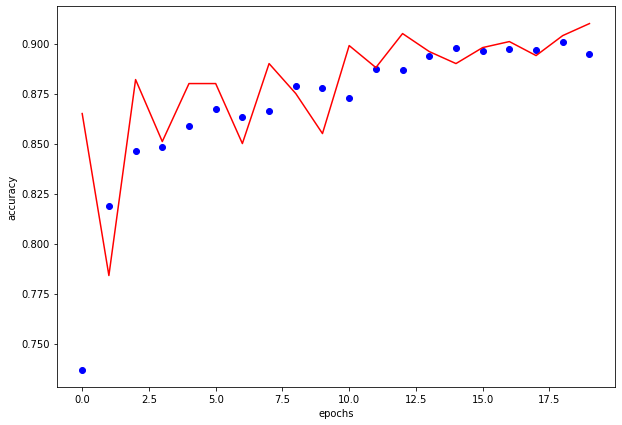

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(range(epochs), history.history["acc"], "bo")
plt.plot(range(epochs), history.history["val_acc"], "r")
plt.xlabel("epochs")
plt.ylabel("accuracy")
